# data cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
sales_data = pd.read_csv("/content/sales_dataset.csv")
sales_data

/tmp/ipython-input-1310574085.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv("/content/sales_dataset.csv")


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128944,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128945,402-9551604-7544318,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128946,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128947,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [3]:
data = sales_data.isnull().sum()
data

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


In [4]:
data = sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

In [5]:
sales_data[sales_data.duplicated()]   # check duplicate rows

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
30652,406-0372545-6086735,04-12-2022,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,L,...,NaN,NaN,Siliguri,WEST BENGAL,734008.0,IN,NaN,False,NaN,NaN
41283,408-0373839-4433120,04-05-2022,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,M,...,NaN,NaN,BENGALURU,KARNATAKA,560072.0,IN,NaN,False,NaN,NaN
79836,171-9628368-5329958,05-07-2022,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,L,...,NaN,NaN,ERNAKULAM,KERALA,682017.0,IN,NaN,False,NaN,False
85782,171-3249942-2207542,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,...,INR,939.0,PUNE,MAHARASHTRA,411057.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
86410,405-8669298-3850736,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,MEN5025,MEN5025-KR-XXXL,kurta,3XL,...,INR,533.0,GHAZIABAD,UTTAR PRADESH,201010.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
98946,407-4853873-4978725,06-22-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-M,Set,M,...,INR,1163.0,Zirakpur,Punjab,140603.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [6]:
data = pd.DataFrame(sales_data)
data

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128944,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128945,402-9551604-7544318,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128946,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128947,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [7]:
data = sales_data.drop(["Unnamed: 22"], axis=1, inplace=True)
data

In [8]:
data = sales_data.drop_duplicates()
data

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128944,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN
128945,402-9551604-7544318,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
128946,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN
128947,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN


In [9]:
data = sales_data["currency"].fillna("INR",inplace=True)
data

/tmp/ipython-input-474741988.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data = sales_data["currency"].fillna("INR",inplace=True)


In [10]:
data = sales_data["Amount"].median()
data

605.0

In [11]:
data = sales_data["Amount"].fillna(sales_data["Amount"].median(),inplace=True)
data

/tmp/ipython-input-4183706676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data = sales_data["Amount"].fillna(sales_data["Amount"].median(),inplace=True)


In [12]:
data = sales_data.loc[sales_data["Amount"] == 0,"Status"] = "Cancelled"
data

'Cancelled'

In [13]:
data = sales_data.loc[sales_data["Status"] == "Cancelled","Amount"] = 0
data

0

In [14]:
data =sales_data["fulfilled-by"].fillna("Easy Ship",inplace=True)
data

/tmp/ipython-input-2270061207.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data =sales_data["fulfilled-by"].fillna("Easy Ship",inplace=True)


In [15]:
data = sales_data["promotion-ids"].fillna("No_promotional_id",inplace=True)
data

/tmp/ipython-input-2929377605.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data = sales_data["promotion-ids"].fillna("No_promotional_id",inplace=True)


In [16]:
data = sales_data["ship-city"].fillna(sales_data["ship-city"].mode()[0],inplace=True)
data = sales_data["ship-state"].fillna(sales_data["ship-state"].mode()[0],inplace=True)
data = sales_data["ship-postal-code"].fillna(sales_data["ship-postal-code"].mode()[0],inplace=True)
data = sales_data["ship-country"].fillna(sales_data["ship-country"].mode()[0],inplace=True)

/tmp/ipython-input-2966027117.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data = sales_data["ship-city"].fillna(sales_data["ship-city"].mode()[0],inplace=True)
/tmp/ipython-input-2966027117.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [17]:
data = sales_data["Courier Status"].fillna("No_Status",inplace=True)
data

/tmp/ipython-input-3049746052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data = sales_data["Courier Status"].fillna("No_Status",inplace=True)


In [18]:
data = sales_data.loc[sales_data["Qty"] == 0 , "Amount"] = 0
data

0

In [19]:
data = sales_data.loc[sales_data["Amount"]== 0 , "Qty"] = 0
data

0

In [20]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      128949 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            128949 non-null  object 
 14  Amount              128949 non-null  float64
 15  ship-city           128949 non-nul

In [22]:
sales_data.isnull().sum()

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


In [23]:
sales_data.to_csv("sales_data.csv", index=False)

In [24]:
data = pd.DataFrame(sales_data)
data

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,0.0,MUMBAI,MAHARASHTRA,400081.0,IN,No_promotional_id,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Easy Ship
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,0.0,PUDUCHERRY,PUDUCHERRY,605008.0,IN,No_promotional_id,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,No_promotional_id,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128944,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,1,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,No_promotional_id,False,Easy Ship
128945,402-9551604-7544318,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,0,INR,0.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship
128946,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,1,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,No_promotional_id,False,Easy Ship
128947,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,1,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship


#*** Data*** **analysis**

In [26]:
total_revenue = sales_data["Amount"].sum()
print(total_revenue)

71715706.0


In [27]:
average_order =sales_data["Qty"].mean()    # average quantity order
print(round(average_order,2))

0.84


In [28]:
average_orders = sales_data.groupby("Category")["Amount"].mean()     # average orders values per category
print(round(average_orders,2))

Category
Blouse           454.44
Bottom           309.22
Dupatta          305.00
Ethnic Dress     631.71
Saree            699.35
Set              711.15
Top              461.75
Western Dress    658.62
kurta            390.02
Name: Amount, dtype: float64


In [29]:
category_selling = sales_data.groupby(["Category","Size"])["Qty"].sum()
category_selling

Category       Size
Blouse         Free     204
               L        120
               M        123
               S        120
               XL       111
               XS        22
               XXL      110
Bottom         3XL       59
               L         61
               M         47
               S         61
               XL        60
               XS        23
               XXL       61
Dupatta        Free       3
Ethnic Dress   3XL      153
               L        151
               M        157
               S        154
               XL       162
               XS        75
               XXL      130
Saree          Free     146
Set            3XL     4939
               4XL       42
               5XL       54
               6XL       65
               Free       1
               L       6840
               M       7779
               S       6200
               XL      6394
               XS      4523
               XXL     5176
Top            3XL     1045
               L       1519
               M       1581
               S       1062
               XL      1606
               XS       792
               XXL     1587
Western Dress  3XL     1689
               L       2401
               M       2197
               S       1836
               XL      2024
               XS      1198
               XXL     1838
kurta          3XL     4904
               4XL      332
               5XL      435
               6XL      593
               L       7457
               M       7084
               S       4766
               XL      7308
               XS      2578
               XXL     6472
Name: Qty, dtype: int64

In [30]:
sales_data["Date"] = pd.to_datetime(sales_data["Date"])

/tmp/ipython-input-4125863832.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_data["Date"] = pd.to_datetime(sales_data["Date"])


In [31]:
sales_data["month"] = sales_data["Date"].dt.month_name()

In [35]:
month_order = ["March", "April", "May", "June"]
sales_data.loc[:,"month"] = pd.Categorical(sales_data["month"], categories=month_order, ordered=True)
highest_month_selling = sales_data.groupby("month")["Amount"].sum().reindex(month_order, fill_value=0)
highest_month_selling

,Amount
month,
March,94810.0
April,26251582.0
May,23969108.0
June,21400206.0


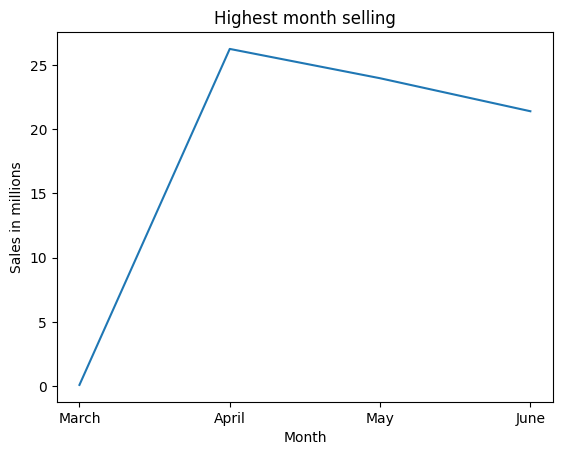

In [36]:
plt.plot(highest_month_selling/1e6)
plt.xlabel("Month")
plt.ylabel("Sales in millions")
plt.title("Highest month selling")
plt.show()


In [37]:
sales_data["Date"] = pd.to_datetime(sales_data["Date"])

In [38]:
sales_data["month"] = sales_data["Date"].dt.month_name()

In [39]:
month_order = ["March", "April", "May", "June"]
sales_data.loc[:,"month"] = pd.Categorical(sales_data["month"], categories=month_order, ordered = True)
canellation_status = sales_data[sales_data["Status"] == "Cancelled"]
cancellation_status_1 = canellation_status["month"].value_counts().reindex(month_order, fill_value=0)
cancellation_status_1

,count
month,
March,18
April,7972
May,6629
June,6065


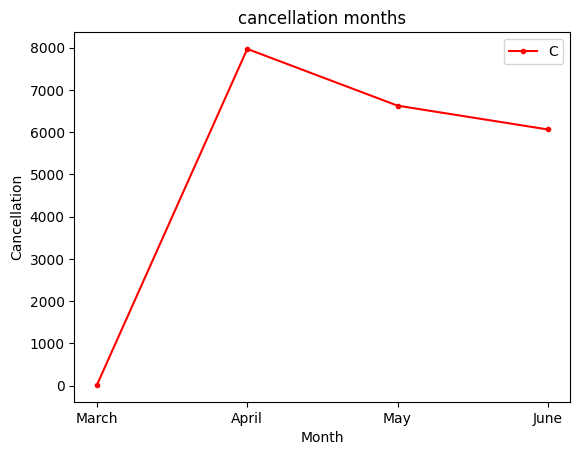

In [40]:
plt.plot(cancellation_status_1 , color= "red" , marker = ".")

plt.xlabel("Month")
plt.ylabel("Cancellation")
plt.legend("Cancellation month")
plt.title("cancellation months")
plt.show()

In [41]:
cancellation_percentage = (cancellation_status_1/124766) * 100
cancellation_percentage

,count
month,
March,0.014427
April,6.389561
May,5.313146
June,4.861100


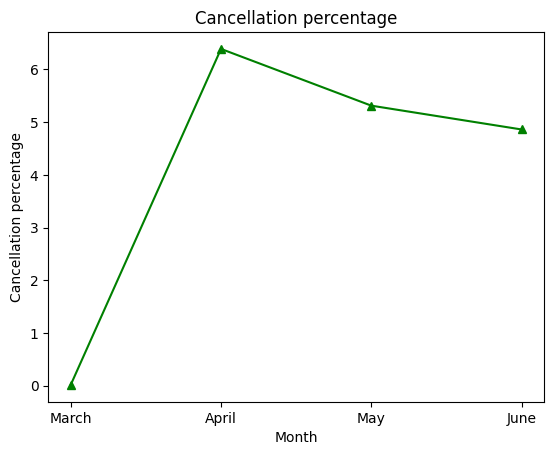

In [42]:
plt.plot(cancellation_percentage,color = "green", marker = "^")
plt.xlabel("Month")
plt.ylabel("Cancellation percentage")
plt.title("Cancellation percentage")
plt.show()

In [43]:
total_cancelated_order = (sales_data["Status"] == "Cancelled").sum()    #  total cancelled orders
print(total_cancelated_order)

20684


In [44]:
sales_data["Date"] = pd.to_datetime(sales_data["Date"])

In [45]:
sales_data["week"] = sales_data["Date"].dt.day_name()
highest_sales_days = sales_data.groupby("week")["Amount"].sum().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
highest_sales_days

,Amount
week,
Monday,10298890.0
Tuesday,10480450.0
Wednesday,10310195.0
Thursday,9486904.0
Friday,9848761.0
Saturday,10288730.0
Sunday,11001776.0


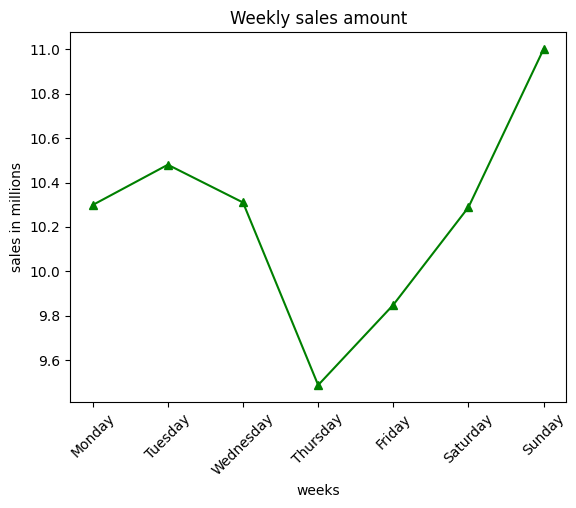

In [46]:
plt.plot(highest_sales_days/1e6,color = "green", marker = "^")
plt.xticks(rotation = 45)
plt.ticklabel_format(style = "plain", axis = "y")
plt.xlabel("weeks")
plt.ylabel("sales in millions")
plt.title("Weekly sales amount")
plt.show()

In [47]:
sales_data["Date"] = pd.to_datetime(sales_data["Date"])

In [48]:
sales_data["week"] = sales_data["Date"].dt.day_name()     # weekly sales
weekly_sales = sales_data.groupby("week")["Qty"].sum().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
print(weekly_sales)

week
Monday       15597
Tuesday      15859
Wednesday    15703
Thursday     14433
Friday       14849
Saturday     15581
Sunday       16608
Name: Qty, dtype: int64


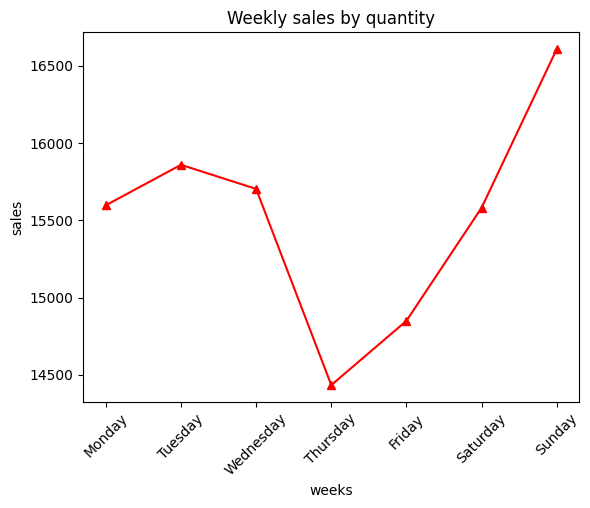

In [49]:
plt.plot(weekly_sales,color = "red", marker = "^")
plt.xticks(rotation = 45)
plt.ticklabel_format(style = "plain", axis = "y")
plt.xlabel("weeks")
plt.ylabel("sales")
plt.title("Weekly sales by quantity")
plt.show()


In [50]:
sales_data["Date"] = pd.to_datetime(sales_data["Date"])

In [51]:
sales_data["weekdays"] = sales_data["Date"].dt.day_name()
average_sales = sales_data.groupby("weekdays")["Amount"].mean().idxmax()
average_sales

'Sunday'

In [52]:
highest_city_sales = sales_data.groupby("ship-city")["Amount"].sum().sort_values(ascending=False)
print(highest_city_sales.head())

ship-city
BENGALURU    6365264.0
HYDERABAD    4495500.0
MUMBAI       3396134.0
NEW DELHI    3329183.0
CHENNAI      2819250.0
Name: Amount, dtype: float64


In [53]:
data = pd.DataFrame(sales_data)
data

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,month,week,weekdays
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,MUMBAI,MAHARASHTRA,400081.0,IN,No_promotional_id,False,Easy Ship,April,Saturday,Saturday
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,April,Saturday,Saturday
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Easy Ship,April,Saturday,Saturday
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,PUDUCHERRY,PUDUCHERRY,605008.0,IN,No_promotional_id,False,Easy Ship,April,Saturday,Saturday
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,CHENNAI,TAMIL NADU,600073.0,IN,No_promotional_id,False,Easy Ship,April,Saturday,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128944,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,HYDERABAD,TELANGANA,500013.0,IN,No_promotional_id,False,Easy Ship,May,Tuesday,Tuesday
128945,402-9551604-7544318,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,May,Tuesday,Tuesday
128946,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,HYDERABAD,TELANGANA,500049.0,IN,No_promotional_id,False,Easy Ship,May,Tuesday,Tuesday
128947,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,May,Tuesday,Tuesday


In [54]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128949 non-null  object        
 1   Date                128949 non-null  datetime64[ns]
 2   Status              128949 non-null  object        
 3   Fulfilment          128949 non-null  object        
 4   Sales Channel       128949 non-null  object        
 5   ship-service-level  128949 non-null  object        
 6   Style               128949 non-null  object        
 7   SKU                 128949 non-null  object        
 8   Category            128949 non-null  object        
 9   Size                128949 non-null  object        
 10  ASIN                128949 non-null  object        
 11  Courier Status      128949 non-null  object        
 12  Qty                 128949 non-null  int64         
 13  currency            128949 no

In [55]:
data = sales_data["Status"].value_counts()
data

,count
Status,
Shipped,76250
Shipped - Delivered to Buyer,28054
Cancelled,20684
Shipped - Returned to Seller,1902
Shipped - Picked Up,945
Pending,641
Pending - Waiting for Pick Up,272
Shipped - Returning to Seller,143
Shipped - Out for Delivery,35


# **financial** **analysis**

In [56]:
total_growth = sales_data.groupby("Date")["Amount"].sum().sort_index()
total_growth

,Amount
Date,
2022-03-31,94810.0
2022-04-01,779737.0
2022-04-02,811110.0
2022-04-03,925049.0
2022-04-04,814313.0
...,...
2022-06-25,606554.0
2022-06-26,706942.0
2022-06-27,657638.0


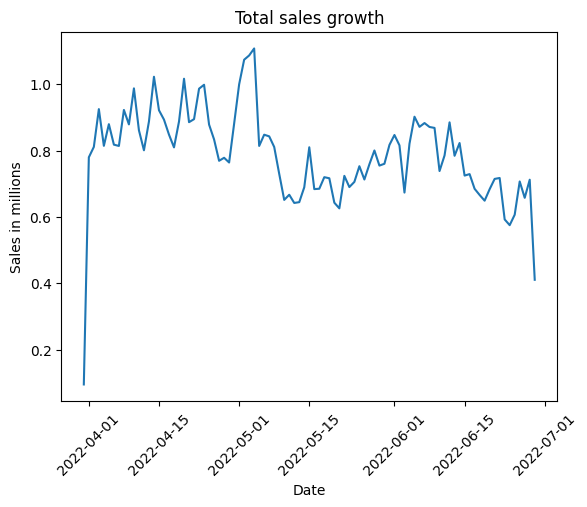

In [57]:
plt.plot(total_growth/1e6)
plt.xticks(rotation = 45)
plt.ticklabel_format(style = "plain", axis = "y")
plt.xlabel("Date")
plt.ylabel("Sales in millions")
plt.title("Total sales growth")
plt.show()

In [58]:
best_selling = sales_data.groupby("Category")["Amount"].sum()
best_selling

,Amount
Category,
Blouse,420809.0
Bottom,136058.0
Dupatta,915.0
Ethnic Dress,731516.0
Saree,114694.0
Set,35752913.0
Top,4904279.0
Western Dress,10205255.0
kurta,19449267.0


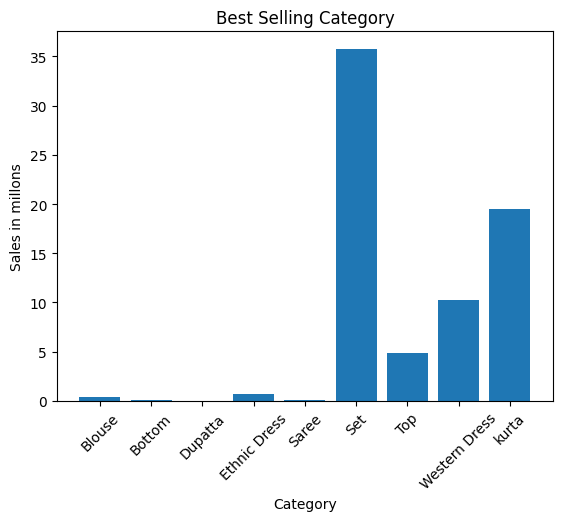

In [59]:
plt.bar(best_selling.index, best_selling.values/1e6)
plt.xlabel("Category")
plt.ylabel("Sales in millons")
plt.title("Best Selling Category")
plt.xticks(rotation = 45)
plt.show()

In [60]:
average_orders = sales_data["Amount"].mean()     # average orders values
print(round(average_orders,2))

556.16


# customer insight

In [61]:
top_performing = sales_data.groupby("ship-city")["Amount"].sum().sort_values(ascending=False)
top_performing

,Amount
ship-city,
BENGALURU,6365264.0
HYDERABAD,4495500.0
MUMBAI,3396134.0
NEW DELHI,3329183.0
CHENNAI,2819250.0
...,...
Barasst,0.0
Bareli,0.0
"MILAK, rampur",0.0


In [62]:
order_canellation = sales_data[sales_data["Status"]=="Cancelled"]["Category"].value_counts()
order_canellation

,count
Category,
Set,8351
kurta,8117
Western Dress,2356
Top,1450
Ethnic Dress,178
Blouse,138
Bottom,72
Saree,22


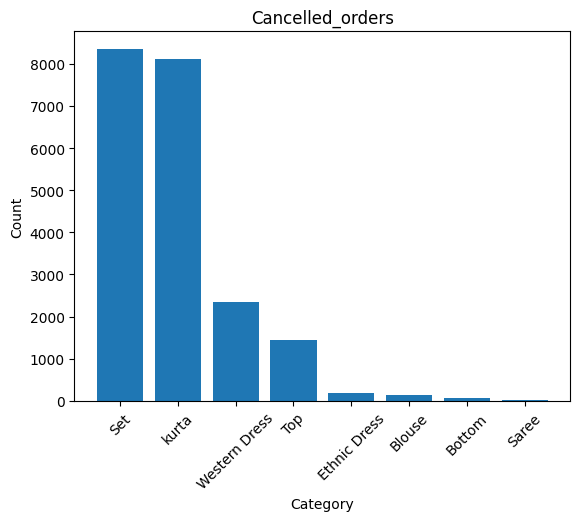

In [63]:
plt.bar(order_canellation.index, order_canellation.values)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Cancelled_orders")
plt.xticks(rotation = 45)
plt.show()

In [64]:
differentiat_b2b = sales_data["B2B"].value_counts()
differentiat_b2b

,count
B2B,
False,128078
True,871


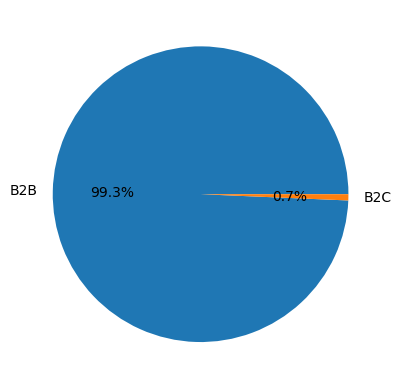

In [65]:
plt.pie(differentiat_b2b, labels = ["B2B","B2C"], autopct = "%1.1f%%")
plt.show()

# **logistic optimization**

In [66]:
orders_fullfilledby = sales_data.groupby("Fulfilment")["Category"].value_counts()
orders_fullfilledby

Fulfilment  Category     
Amazon      kurta            35617
            Set              35541
            Western Dress     8528
            Top               8071
            Ethnic Dress       847
            Blouse             692
            Bottom             248
            Saree              132
            Dupatta              3
Merchant    Set              14734
            kurta            14250
            Western Dress     6967
            Top               2550
            Ethnic Dress       311
            Blouse             234
            Bottom             192
            Saree               32
Name: count, dtype: int64

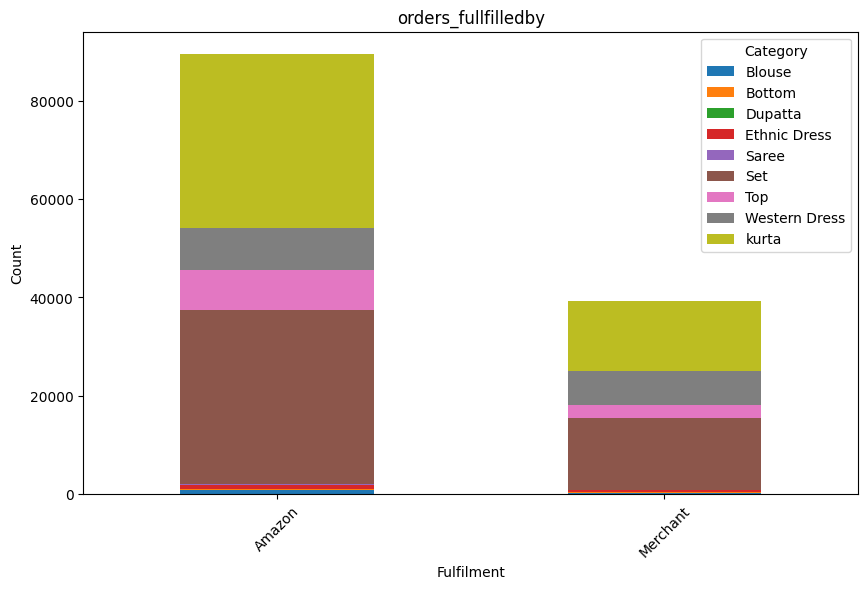

In [67]:
orders_fullfilledby = sales_data.groupby(["Fulfilment", "Category"]).size().unstack(fill_value=0)

orders_fullfilledby.plot(kind="bar", stacked=True, figsize=(10,6))
plt.xlabel("Fulfilment")
plt.ylabel("Count")
plt.title("orders_fullfilledby")
plt.xticks(rotation = 45)
plt.show()

# product management

In [68]:
high_demand = sales_data["Category"].value_counts()
high_demand

,count
Category,
Set,50275
kurta,49867
Western Dress,15495
Top,10621
Ethnic Dress,1158
Blouse,926
Bottom,440
Saree,164
Dupatta,3


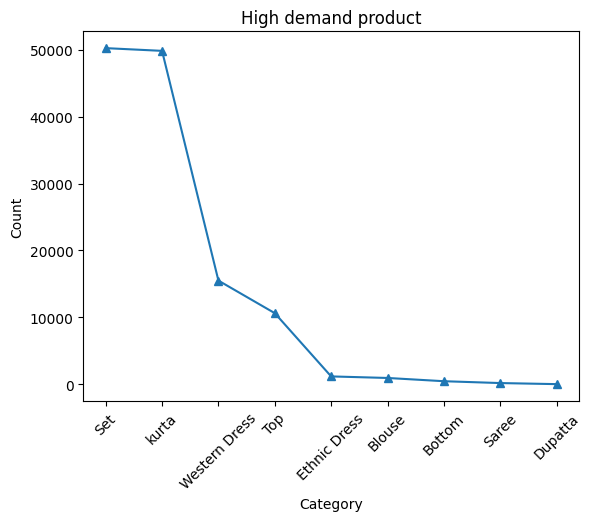

In [69]:
plt.plot(high_demand,marker = "^")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("High demand product")
plt.xticks(rotation = 45)
plt.show()

In [70]:
average_quantity = sales_data["Qty"].mean()
print(round(average_quantity,4))

0.8424


In [71]:
sales_data["Date"] = pd.to_datetime(sales_data["Date"])


In [72]:
sales_month = sales_data.groupby(sales_data["Date"].dt.to_period("M"))["Qty"].sum()
sales_month

,Qty
Date,
2022-03,152
2022-04,41253
2022-05,35519
2022-06,31706


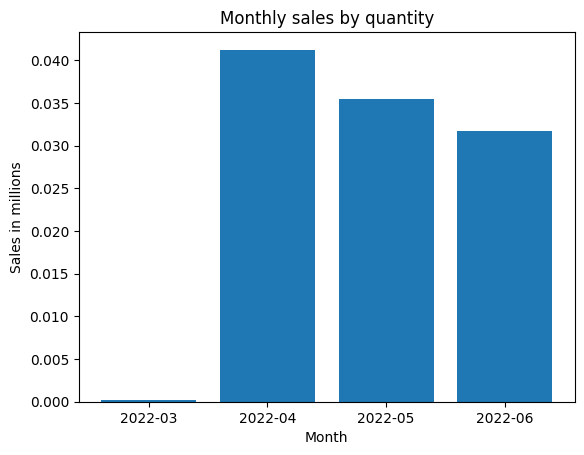

In [73]:
plt.bar(sales_month.index.astype(str), sales_month.values/1e6)
plt.xlabel("Month")
plt.ylabel("Sales in millions")
plt.title("Monthly sales by quantity")
plt.show()

# customers satisfaction

In [74]:
returned_product = sales_data[sales_data["Status"] == "Shipped - Returned to Seller"]["Category"].value_counts()
returned_product

,count
Category,
Set,746
kurta,703
Western Dress,302
Top,118
Ethnic Dress,16
Blouse,12
Bottom,4
Saree,1


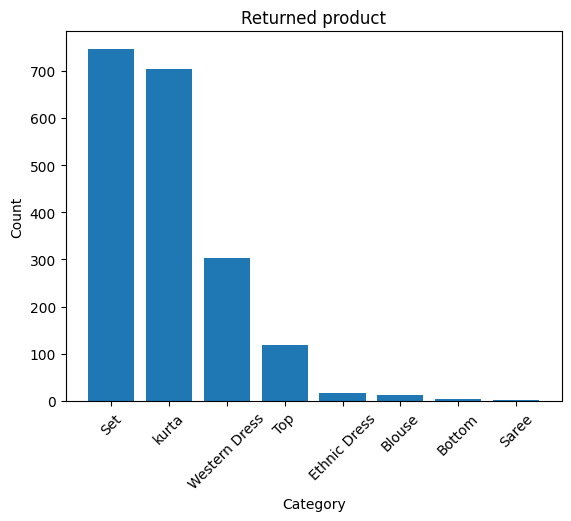

In [75]:
plt.bar(returned_product.index, returned_product.values)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Returned product")
plt.xticks(rotation = 45)
plt.show()

In [76]:
sales_data.to_csv("sales_data.csv" , index = True)
from google.colab import files
files.download("sales_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Recommendation

1. Cancellations Analysis

   Categories, states, and courier statuses with the highest cancellation rates were identified.
   Sets and Kurtas show unusually high cancellation levels, likely due to size issues, poor product descriptions, or quality mismatch.
   Courier performance also indicates a link between delayed/unshipped orders and cancellations.

2. Sales & Category Performance

   Monthly sales vs. cancellations trends highlight that cancellations are eating into growth.
   While some categories perform well, Sets and Kurtas are negatively impacting overall performance.

3. Geographical Insights

   Top-performing states and cities contribute significantly to sales, but also reflect higher cancellations in key markets, affecting customer trust.

4. Courier & Order Processing

   Unshipped orders remain a major pain point. Faster processing and better coordination with courier partners can directly reduce cancellations.

5. Average Order Value (AOV)

   Current AOV is ₹575, which is modest.
   Opportunities exist to boost sales through bundled offers and upselling, e.g., Buy 2 Kurtas, get 1 Top at a discount.






# Conclusion

Dataset size:124,849 rows and 22 columns.
Data Cleaning:

  Conducted using Python (pandas).
  Missing values handled by filling with median (585).
  2,669 outliers identified in the dataset.

1.  Sales Performance

   April recorded the highest sales month.
   Sunday is the highest sales day of the week.
   Bangalore emerged as the top-performing city.
   Sets generated the highest revenue, while Kurtas were the highest-selling product.

2. Order Fulfillment & Channels

   Amazon Fulfillment significantly outperformed Merchant Fulfillment in handling orders.

3. Cancellations & Outliers

   20,684 orders were cancelled.
   The cancellation rate is 16.4%, which is considerably high.
   Cancellation issues were more prominent in categories like Sets and Kurtas.

4. Customer & Market Behavior

   Financial & Logistics Insights: Delays and unshipped orders are directly tied to cancellations.
   Customer behavior shows a preference for Kurtas and Sets, but these categories also face the highest dissatisfaction due to cancellations.

